<a href="https://colab.research.google.com/github/LisaaHaut/my.repo/blob/main/ADS_04_GettingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

WS2022 | Prof. Dr. Christoph Flath

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-REST-(Representational-State-Transfer)" data-toc-modified-id="Introduction-to-REST-(Representational-State-Transfer)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to REST (Representational State Transfer)</a></span></li><li><span><a href="#API-Example:-Geocoding-with-OpenStreetMap" data-toc-modified-id="API-Example:-Geocoding-with-OpenStreetMap-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>API Example: Geocoding with OpenStreetMap</a></span></li><li><span><a href="#Web-Scraping-Overview" data-toc-modified-id="Web-Scraping-Overview-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Web Scraping Overview</a></span></li><li><span><a href="#Basics-of-Web-Technology" data-toc-modified-id="Basics-of-Web-Technology-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Basics of Web Technology</a></span></li><li><span><a href="#Scraping-with-rvest:-Main-functions-and-basic-workflow" data-toc-modified-id="Scraping-with-rvest:-Main-functions-and-basic-workflow-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scraping with <code>rvest</code>: Main functions and basic workflow</a></span></li><li><span><a href="#Subpage-Navigation" data-toc-modified-id="Subpage-Navigation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Subpage Navigation</a></span></li></ul></div>

## Introduction to REST

* Architectural pattern for developing web services

**RE**presentational: Clients possess the information necessary to identify, modify, and/or delete a web resource<br>
**S**tate: All resource state information is stored on the client<br>
**T**ransfer: Client state is passed from client to service via HTTP

* REST web services communicate over the HTTP specification, using HTTP vocabulary including methods (GET, POST, etc.), URI syntax (paths, parameters, etc.), media types (xml, html, etc.) and response codes

### HTTP request

* Sent from the client
* Identifies the location of a *resource*
* Specifies the HTTP *method* to use when accessing the resource
* Supplies optional *request headers* (name-value pairs) that provide additional information the server may need when processing the request
* Supplies an optional *request body* that identifies additional data to be uploaded to the server (e.g. form parameters, attachments, etc.)

### HTTP response

* Sent from the server
* Gives the *status* of the processed request
* Supplies *response headers* (name-value pairs) that provide additional information about the response
* Supplies an optional *response body* that identifies additional data to be downloaded to the client (html, xml, binary data, etc.)

### JavaScript Object Notation (JSON)

* A lightweight data-interchange format

* A subset of the object literal notation of JavaScript (or ECMA-262).

* A JSON string must be enclosed by double quotes.

* See http://json.org/ for the detailed syntax of JSON.

### Benefits of JSON

* Easy to parse and generate
* Maps to native types in most languages
* Standardized and Unicode based
* Supported by all browsers

### Two basic structures in JSON

A collection of name/value pairs `{ "a":1,"b":2,"c":3 }`

* In various languages, this is realized as an object, record, struct, dictionary, hash table, keyed list, or associative array.


An ordered list of values `[ 1, 2, 3, "value #4 with" ]`
*  In most languages, this is realized as an array, vector, list, or sequence.

### Example: An address book encoded in JSON

```
{
   "fullname": "Sean Kelly",
   "org": "SK Consulting",
   "emailaddrs": [
      {"type": "work", "value": "kelly@seankelly.biz"},
      {"type": "home", "pref": 1, "value": "kelly@seankelly.tv"}
   ],
    "telephones": [
      {"type": "work", "pref": 1, "value": "+1 214 555 1212"},
      {"type": "fax", "value": "+1 214 555 1213"},
      {"type": "mobile", "value": "+1 214 555 1214"}
   ],
   "addresses": [
      {"type": "work", "format": "us",
       "value": "1234 Main StnSpringfield, TX 78080-1216"},
      {"type": "home", "format": "us",
       "value": "5678 Main StnSpringfield, TX 78080-1316"}
   ],
    "urls": [
      {"type": "work", "value": "http://seankelly.biz/"},
      {"type": "home", "value": "http://seankelly.tv/"}
   ]
}
```

### `jsonlite` in R
* The `jsonlite` Package offers "a practical and consistent mapping between JSON data and R objects"
* It is a JSON parser/generator optimized for the web
* Its main strength is that it implements a bidirectional mapping between JSON data and the most important R data types. Thereby we can convert between R objects and JSON without loss of type or information, and without the need for any manual data munging
* This is ideal for interacting with web APIs, or to build pipelines where data structures seamlessly flow in and out of R using JSON

***

JSON Structure | JSON data | R class
--- | --- | ---
Array of primitives | `["Amsterdam", "Rotterdam", "Utrecht", "Den Haag"]` | Vector
Array of objects | `[{"name":"Erik", "age":43}, {"name":"Anna", "age":32}]` | DataFrame
Array of arrays | `[ [1, 2, 3], [4, 5, 6] ]` | Matrix

## API Example: Geocoding with OpenStreetMap

> Geocoding is the process of converting addresses (like "1600 Amphitheatre Parkway, Mountain View, CA") into geographic coordinates (like latitude 37.423021 and longitude -122.083739), which you can use to place markers on a map, or position the map.

In [10]:
library(jsonlite)

url = "https://nominatim.openstreetmap.org/search?q="
query = "sanderring+2+würzburg"
urlfinal = paste0(url,query,"&format=json")


geocode = fromJSON(urlfinal)
geocode


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance
,<int>,<chr>,<chr>,<dbl>,<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,113178782,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",way,24607339,"49.7877725, 49.7885812, 9.9344687 , 9.9360027",49.788189900000006,9.93521145214725,"2, Sanderring, Würzburg Altstadt, Würzburg, Bayern, 97070, Deutschland",historic,building,0.4299311
2,42375035,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,3481869919,"49.7880236, 49.7881236, 9.9353009 , 9.9354009",49.7880736,9.9353509,"2, Sanderring, Würzburg Altstadt, Würzburg, Bayern, 97070, Deutschland",emergency,defibrillator,0.3100100


In [ ]:
url = "https://nominatim.openstreetmap.org/search?q="
query = "bakeries+in+würzburg,+germany"
urlfinal = paste0(url,query,"&format=json&limit=50")

bakeries = fromJSON(urlfinal)
bakeries

,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance,icon
,<int>,<chr>,<chr>,<dbl>,<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,624895,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,248216660,"49.7927451, 49.7928451, 9.9246174 , 9.9247174",49.7927951,9.9246674,"Müller-Bäck, 1, Saalgasse, Mainviertel, Würzburg Altstadt, Würzburg, Bayern, 97082, Deutschland",shop,bakery,0.20010,https://nominatim.openstreetmap.org/ui/mapicons/shopping_bakery.p.20.png
2,790245,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,278968388,"49.8118542, 49.8119542, 9.9765255 , 9.9766255",49.8119042,9.9765755,"Killiansbäck, 7, Industriestraße, Lengfeld, Würzburg, Bayern, 97076, Deutschland",shop,bakery,0.20010,https://nominatim.openstreetmap.org/ui/mapicons/shopping_bakery.p.20.png
3,802934,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,281031327,"49.7643094, 49.7644094, 9.9496499 , 9.9497499",49.7643594,9.9496999,"Rösner Backstube, 3, Klosterstraße, Heidingsfeld, Würzburg, Bayern, 97084, Deutschland",shop,bakery,0.20010,https://nominatim.openstreetmap.org/ui/mapicons/shopping_bakery.p.20.png
4,808305,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,281266819,"49.7636295, 49.7637295, 9.9520943 , 9.9521943",49.7636795,9.9521443,"Körner, 32, Klosterstraße, Heidingsfeld, Würzburg, Bayern, 97084, Deutschland",shop,bakery,0.20010,https://nominatim.openstreetmap.org/ui/mapicons/shopping_bakery.p.20.png
5,830400,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,286064771,"49.7839513, 49.7840513, 9.9348611 , 9.9349611",49.7840013,9.9349111,"Webers, 24, Weingartenstraße, Sanderau, Würzburg, Bayern, 97072, Deutschland",shop,bakery,0.20010,https://nominatim.openstreetmap.org/ui/mapicons/shopping_bakery.p.20.png
6,1275261,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,317351155,"49.8083566, 49.8084566, 9.962808 , 9.962908",49.8084066,9.962858,"Rösner, Frankenstraße, Lindleinsmühle, Würzburg, Bayern, 97078, Deutschland",shop,bakery,0.20010,https://nominatim.openstreetmap.org/ui/mapicons/shopping_bakery.p.20.png
7,3118624,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,401792521,"49.7843351, 49.7844351, 9.9513545 , 9.9514545",49.7843851,9.9514045,"Rösner Backstube, 25, Zeppelinstraße, Keesburg, Frauenland, Würzburg, Bayern, 97074, Deutschland",shop,bakery,0.20010,https://nominatim.openstreetmap.org/ui/mapicons/shopping_bakery.p.20.png
8,3833633,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,498845944,"49.7984696, 49.7985696, 9.9458272 , 9.9459272",49.7985196,9.9458772,"Müllerbäck, 6, Schweinfurter Straße, Würzburg Altstadt, Würzburg, Bayern, 97080, Deutschland",shop,bakery,0.20010,https://nominatim.openstreetmap.org/ui/mapicons/shopping_bakery.p.20.png
9,3847454,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,497581164,"49.78009 , 49.78019 , 9.9650229, 9.9651229",49.78014,9.9650729,"Höreder Beck, 122, Zeppelinstraße, Hubland, Frauenland, Würzburg, Bayern, 97074, Deutschland",shop,bakery,0.20010,https://nominatim.openstreetmap.org/ui/mapicons/shopping_bakery.p.20.png


In [9]:
install.packages('ggmap')
library(ggmap)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘Rcpp’, ‘RgoogleMaps’, ‘png’, ‘plyr’, ‘jpeg’, ‘bitops’


The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

ℹ Google's Terms of Service: <https://mapsplatform.google.com>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.


In [8]:
library(tidyverse)
bakeries %>%
    mutate(lon=as.numeric(lon), lat=as.numeric(lat)) %>%
    mutate(name = str_split(display_name,",",simplify = TRUE)[,1])-> bakeries

sq_map2 <- get_stamenmap(c(0.9945*min(bakeries$lon),
                           0.9995*min(bakeries$lat),
                           1.006*max(bakeries$lon),
                           1.0005*max(bakeries$lat)),  source = "stamen", zoom = 12)

options(repr.plot.width=15, repr.plot.height=8)
ggmap(sq_map2) + geom_point(data=bakeries,aes(x=lon, y=lat, color=name), size = 3)

ERROR: ignored

### Example with authentification: New York Times Article Search

In [ ]:
article_key <- "xOugxCQmnxAEYsq4BUvbjMGsyR4jZJoB"#(http://developer.nytimes.com/signup)
url <- "http://api.nytimes.com/svc/search/v2/articlesearch.json?q=soccer&begin_date=20180101&end_date=20220601&api-key="
req <- fromJSON(paste0(url, article_key), simplifyDataFrame = F)

In [ ]:
head(req$response$docs,1)

[[1]]
[[1]]$abstract
[1] "Landmark labor agreements with members of the men’s and women’s national teams will include higher paychecks and shared World Cup prize money."

[[1]]$web_url
[1] "https://www.nytimes.com/2022/05/18/sports/soccer/us-soccer-equal-pay-deal.html"

[[1]]$snippet
[1] "Landmark labor agreements with members of the men’s and women’s national teams will include higher paychecks and shared World Cup prize money."

[[1]]$lead_paragraph
[1] "As the women’s soccer stars stared at their laptop screens Monday night and the new labor deal was explained to them, the numbers just kept climbing. A few thousand dollars here. Tens of thousands of dollars there. Pretty soon, the figures had crossed into the millions."

[[1]]$print_section
[1] "A"

[[1]]$print_page
[1] "1"

[[1]]$source
[1] "The New York Times"

[[1]]$multimedia
[[1]]$multimedia[[1]]
[[1]]$multimedia[[1]]$rank
[1] 0

[[1]]$multimedia[[1]]$subtype
[1] "xlarge"

[[1]]$multimedia[[1]]$caption
NULL

[[1]]$multimedia[[1]]$credit
NULL

[[1]]$multimedia[[1]]$type
[1] "image"

[[1]]$multimedia[[1]]$url
[1] "images/2022/05/18/multimedia/18equalpay-lead1/18equalpay-lead1-articleLarge.jpg"

[[1]]$multimedia[[1]]$height
[1] 400

[[1]]$multimedia[[1]]$width
[1] 600

[[1]]$multimedia[[1]]$legacy
[[1]]$multimedia[[1]]$legacy$xlarge
[1] "images/2022/05/18/multimedia/18equalpay-lead1/18equalpay-lead1-articleLarge.jpg"

[[1]]$multimedia[[1]]$legacy$xlargewidth
[1] 600

[[1]]$multimedia[[1]]$legacy$xlargeheight
[1] 400


[[1]]$multimedia[[1]]$subType
[1] "xlarge"

[[1]]$multimedia[[1]]$crop_name
[1] "articleLarge"


[[1]]$multimedia[[2]]
[[1]]$multimedia[[2]]$rank
[1] 0

[[1]]$multimedia[[2]]$subtype
[1] "popup"

[[1]]$multimedia[[2]]$caption
NULL

[[1]]$multimedia[[2]]$credit
NULL

[[1]]$multimedia[[2]]$type
[1] "image"

[[1]]$multimedia[[2]]$url
[1] "images/2022/05/18/multimedia/18equalpay-lead1/18equalpay-lead1-popup.jpg"

[[1]]$multimedia[[2]]$height
[1] 433

[[1]]$multimedia[[2]]$width
[1] 650

[[1]]$multimedia[[2]]$legacy
named list()

[[1]]$multimedia[[2]]$subType
[1] "popup"

[[1]]$multimedia[[2]]$crop_name
[1] "popup"


[[1]]$multimedia[[3]]
[[1]]$multimedia[[3]]$rank
[1] 0

[[1]]$multimedia[[3]]$subtype
[1] "blog480"

[[1]]$multimedia[[3]]$caption
NULL

[[1]]$multimedia[[3]]$credit
NULL

[[1]]$multimedia[[3]]$type
[1] "image"

[[1]]$multimedia[[3]]$url
[1] "images/2022/05/18/multimedia/18equalpay-lead1/18equalpay-lead1-blog480.jpg"

[[1]]$multimedia[[3]]$height
[1] 320

[[1]]$multimedia[[3]]$width
[1] 480

[[1]]$multimedia[[3]]$legacy
named list()

[[1]]$multimedia[[3]]$subType
[1] "blog480"

[[1]]$multimedia[[3]]$crop_name
[1] "blog480"


[[1]]$multimedia[[4]]
[[1]]$multimedia[[4]]$rank
[1] 0

[[1]]$multimedia[[4]]$subtype
[1] "blog533"

[[1]]$multimedia[[4]]$caption
NULL

[[1]]$multimedia[[4]]$credit
NULL

[[1]]$multimedia[[4]]$type
[1] "image"

[[1]]$multimedia[[4]]$url
[1] "images/2022/05/18/multimedia/18equalpay-lead1/18equalpay-lead1-blog533.jpg"

[[1]]$multimedia[[4]]$height
[1] 355

[[1]]$multimedia[[4]]$width
[1] 533

[[1]]$multimedia[[4]]$legacy
named list()

[[1]]$multimedia[[4]]$subType
[1] "blog533"

[[1]]$multimedia[[4]]$crop_name
[1] "blog533"


[[1]]$multimedia[[5]]
[[1]]$multimedia[[5]]$rank
[1] 0

[[1]]$multimedia[[5]]$subtype
[1] "blog427"

[[1]]$multimedia[[5]]$caption
NULL

[[1]]$multimedia[[5]]$credit
NULL

[[1]]$multimedia[[5]]$type
[1] "image"

[[1]]$multimedia[[5]]$url
[1] "images/2022/05/18/multimedia/18equalpay-lead1/18equalpay-lead1-blog427.jpg"

[[1]]$multimedia[[5]]$height
[1] 285

[[1]]$multimedia[[5]]$width
[1] 427

[[1]]$multimedia[[5]]$legacy
named list()

[[1]]$multimedia[[5]]$subType
[1] "blog427"

[[1]]$multimedia[[5]]$crop_name
[1] "blog427"


[[1]]$multimedia[[6]]
[[1]]$multimedia[[6]]$rank
[1] 0

[[1]]$multimedia[[6]]$subtype
[1] "tmagSF"

[[1]]$multimedia[[6]]$caption
NULL

[[1]]$multimedia[[6]]$credit
NULL

[[1]]$multimedia[[6]]$type
[1] "image"

[[1]]$multimedia[[6]]$url
[1] "images/2022/05/18/multimedia/18equalpay-lead1/1

In [ ]:
getNewsItem = function(x) {data.frame(
                                            title = x$headline$main,
                                            excerpt = x$lead_paragraph,
                                            date = x$pub_date
    )
                          }

items = map_df(req$response$docs, getNewsItem)

In [ ]:
items

title,excerpt,date
<chr>,<chr>,<chr>
U.S. Soccer and Top Players Agree to Guarantee Equal Pay,"As the women’s soccer stars stared at their laptop screens Monday night and the new labor deal was explained to them, the numbers just kept climbing. A few thousand dollars here. Tens of thousands of dollars there. Pretty soon, the figures had crossed into the millions.",2022-05-18T11:33:09+0000
How U.S. Soccer and Its Players Solved the Equal Pay Puzzle,"The new collective bargaining agreements approved this week by the United States Soccer Federation and its men’s and women’s national teams will, at last, bring an end to a decades-long, emotionally exhausting and wildly expensive fight over equal pay.",2022-05-18T23:32:30+0000
"In Milan, an Iconic Stadium Isn’t Going Down Without a Fight","As he watched the soccer game playing out on television, the Milanese writer and actor Gianfelice Facchetti felt an emotional tug that he thought might be leading him toward his next book.",2022-05-20T12:24:11+0000
"Ukraine Inches Closer to World Cup, Carrying Hopes of a Nation at War","The emotion, in anticipation, had been so raw that at times it was easy to worry that it might prove overwhelming. Oleksandr Zinchenko, a Ukraine midfielder, had talked about pride, about freedom, about proving to the world that his country would “never give up.” He had welled up with tears as he spoke.",2022-06-01T22:54:43+0000
"40,000 Fake Tickets at the Champions League Final? It Was Really 2,589.",One of the main claims pushed by French officials to explain the chaotic crowd scenes that created a dangerous crush of fans outside last weekend’s Champions League final near Paris has been that tens of thousands of people arrived at the match bearing fake tickets.,2022-06-01T15:41:09+0000
"For U.S., World Cup Stretch Run Starts With a Sprint","CINCINNATI — Until a few days ago, Malik Tillman, a 20-year-old midfielder from Nuremberg, Germany, had never stepped foot on American soil.",2022-06-01T14:53:13+0000
UEFA Blames Delay at Champions League Final on ‘Fake Tickets’,"PARIS — A logjam of fans that led to a 35-minute delay of the start of Saturday’s Champions League final between Real Madrid and Liverpool was caused by people attempting to use “fake tickets” to enter the match, the tournament’s organizer said.",2022-05-28T21:28:21+0000
The True Cost of Kylian Mbappé’s New Deal,"It was not, Kylian Mbappé would like you to know, about the money. True, it might look — to the childlike, the innocent, the uninformed — as if he has spent the last year or so playing Real Madrid and Paris St.-Germain off one another in order to drive up his value and elicit the most lucrative contract possible. But that, rest assured, is just an illusion.",2022-05-27T14:45:06+0000
The Liverpool Star Who Came Out of Nowhere,Follow live updates of the UEFA Champions League final.,2022-05-27T18:24:11+0000


### Pagination

> Pagination
The Article Search API returns a max of 10 results at a time. The meta node in the response contains the total number of matches ("hits") and the current offset. Use the page query parameter to paginate thru results (page=0 for results 1-10, page=1 for 11-20, ...). You can paginate thru up to 100 pages (1,000 results). If you get too many results try filtering by date range.

### Rate Limit

> 11. Is there an API call limit?
Yes, there are two rate limits per API: 4,000 requests per day and 10 requests per minute. You should sleep 6 seconds between calls to avoid hitting the per minute rate limit. If you need a higher rate limit, please contact us at code@nytimes.com.

In [ ]:
getResultsPage = function(page)
    {
url <- "http://api.nytimes.com/svc/search/v2/articlesearch.json?q=soccer&begin_date=20180101&end_date=20220601&api-key="
req <- fromJSON(paste0(url, article_key, "&page=", page), simplifyDataFrame = F)
    Sys.sleep(10)
    return(req)
}

allresults = map(1:20, getResultsPage)

Warning message in open.connection(con, "rb"):
“cannot open URL 'http://api.nytimes.com/svc/search/v2/articlesearch.json?q=soccer&begin_date=20180101&end_date=20220601&api-key=xOugxCQmnxAEYsq4BUvbjMGsyR4jZJoB&page=6': HTTP status was '429 Unknown Error'”


ERROR: ignored

In [ ]:
getSubsetOfNewsItems = function(x){map_df(allresults[[x]]$response$docs, getNewsItem)}

In [ ]:
allitems = map_df(1:20, getSubsetOfNewsItems)
allitems

title,excerpt,date
<chr>,<chr>,<chr>
"Inside the Chelsea Sale: Deep Pockets, Private Promises and Side Deals","LONDON — The British government on Wednesday gave its blessing to the purchase of Chelsea F.C., one of European soccer’s blue-ribbon teams, by an American-led investment group after deciding it had sufficient assurances that none of the proceeds from the record sale price — $3.1 billion — would flow to the club’s Russian owner.",2022-05-24T22:23:13+0000
Manchester City Wins Premier League Title After Nearly Kicking It Away,"MANCHESTER, England — In that wild, euphoric moment, as the stands rattled and shook, Manchester City felt it again, that sensation it had known once, not all that long ago, the one enshrined in a shimmering statue on the plaza outside the Etihad Stadium. They would, they had been told, never see its like again. They could, it turned out, come very close indeed.",2022-05-22T05:00:09+0000
"Kylian Mbappé Will Stay at P.S.G., Rejecting Real Madrid","Paris St.-Germain has persuaded Kylian Mbappé to sign a new contract, one of the richest in soccer history, that will keep the French striker at the club for the next three years while he pursues a second consecutive World Cup with France and attempts to end the club’s string of failures in the Champions League.",2022-05-21T14:11:57+0000
Lyon’s Women Bridge Eras in a Changing Champions League,"They have gone, one by one, not so much swept aside as barged out of the way. Umea, the Swedish team that first brought Marta to Europe, the superpower that appeared in the first three finals of what would become the women’s Champions League, ran first into financial ruin and then, as night follows day, sporting disrepair.",2022-05-20T15:45:08+0000
Real Madrid Secures $380 Million Investment,"Real Madrid, the European soccer behemoth, closed a deal in which the investment firm Sixth Street, based in the United States, will pay about $380 million for a 30 percent stake in the team’s stadium operations.",2022-05-19T16:13:45+0000
FIFA Picks First Female Officials for Men’s World Cup,"The Qatar World Cup was always going to be full of firsts: the first time it will be played in the Middle East; the first time it will be played in November and December. Now, it may also be the first men’s World Cup tournament in which a game is refereed by a woman.",2022-05-19T12:00:06+0000
‘Wagatha Christie’ Case Offers a Riveting Peek Into Celebrity Culture,"LONDON — A candid window into the glamorous world of English soccer, and an exposé of the machinations of back-stabbing celebrities. A phone lost to the sea, along with the evidence it supposedly contained. And a legal whodunit with powerhouse lawyers dissecting private WhatsApp messages in open court as tears flowed on the witness stand.",2022-05-19T10:41:53+0000
P.S.G. Player Benched for Refusing to Wear Rainbow Jersey,"Idrissa Gueye traveled south to Montpellier with his Paris St.-Germain teammates for the team’s league game on Saturday but wound up watching it from the stands. Gueye was not injured, his coach said after P.S.G.’s victory: He “had to leave the team for personal reasons.”",2022-05-16T16:45:12+0000
New Heights and Old Grudges as Turkey Crowns Its Champion,"Asked why her team’s next home game on Sunday is being played in Istanbul instead of in its usual setting, the official from the Turkish club Trabzonspor said the turf at the team’s Senol Günes Stadium had been damaged after — in her words — “some people got on the field in our last match.”",2022-05-13T15:00:06+0000


In [11]:
library(lubridate)

allitems %>%
    mutate(date = ymd_hms(date)) %>%
    mutate(month = month(date),
          year = year(date)) %>%
    group_by(year, month) %>%
    tally() %>%
    ggplot(aes(x=ym(paste(year,month)), y=n)) + geom_line()

ERROR: ignored

Programming Task
=====

The following API call gives you gasoline prices for a latitude / longitude pair and a 1.5km radius

Write a function that takes a Location as argument which is then translated to coordinates and subsequently obtains the gasoline prices around these coordinates

In [ ]:
lat = "49.8"
lng = "9.9"
url=paste0("https://creativecommons.tankerkoenig.de/json/list.php?lat=49.8&lng=9.9&rad=3.5&sort=dist&type=all&apikey=e23dc02b-8d60-a1b2-0c83-be6e179ac545")
req <- fromJSON(url)

In [ ]:
req$stations

,id,name,brand,street,place,lat,lng,dist,diesel,e5,e10,isOpen,houseNumber,postCode
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<int>
1,8336b8d7-01fc-4f79-bdd3-6870c8268035,BayWa Tankstelle Würzburg Hafen,BayWa,Südliche Hafenstr.,Würzburg,49.80033,9.894948,0.4,1.919,NA,NA,TRUE,6,97080
2,eb4c4468-4117-4b6e-a5a4-aaf8d3b71be2,Jankowski Arno,bft - Walther,Nördliche Hafenstr.,Würzburg,49.80107,9.893567,0.5,1.949,1.989,1.929,TRUE,,97080
3,96643575-4de1-478f-9213-c9a19b2b01b6,Freie Tankstelle,Freie Tankstelle,Mainaustr.,Würzburg,49.79586,9.895761,0.6,1.929,1.979,1.919,FALSE,59,97082
4,51d4b60a-a095-1aa0-e100-80009459e03a,Supermarkt-Tankstelle WUERZBURG FRANKFURTER STR. 98,Supermarkt-Tankstelle,FRANKFURTER STR.,WUERZBURG,49.79460,9.894710,0.7,1.929,1.979,1.919,TRUE,98,97082
5,e2bd403b-b8c2-43de-8678-9de7a0cf6003,Aral Tankstelle,ARAL,ALBERT-EINSTEIN-STR.,WÜRZBURG,49.80843,9.886323,1.4,1.959,1.999,1.939,TRUE,1a,97080
6,d2a2bf1d-d833-4a5b-8ce2-96103f810361,Aral Tankstelle,ARAL,Wörthstraße,Würzburg,49.79304,9.916193,1.4,1.949,1.999,1.939,TRUE,1A,97082
7,51d4b51e-a095-1aa0-e100-80009459e03a,JET WUERZBURG HOECHBERGER STR. 10,JET,HOECHBERGER STR.,WUERZBURG,49.79270,9.916680,1.4,1.919,1.989,1.929,TRUE,10,97082
8,0b30f5a0-8900-406f-9d74-dd948144745e,Esso Tankstelle,ESSO,VEITSHOECHHEIMER STR. 22,WUERZBURG,49.80320,9.920780,1.5,1.949,1.999,1.939,TRUE,,97080
9,d52b2ac2-ddd7-440f-8dec-8ed05b17ba8c,Shell Wuerzburg Veitshoechheimer Str. 8,Shell,Veitshoechheimer Str.,Wuerzburg,49.80138,9.923587,1.7,1.929,1.979,1.919,TRUE,8,97080


In [ ]:
library(ggmap)
sq_map2 <- get_stamenmap(c(0.9945*min(req$stations$lng),
                           0.9995*min(req$stations$lat),
                           1.006*max(req$stations$lng),
                           1.0005*max(req$stations$lat)),  source = "stamen", zoom = 12)

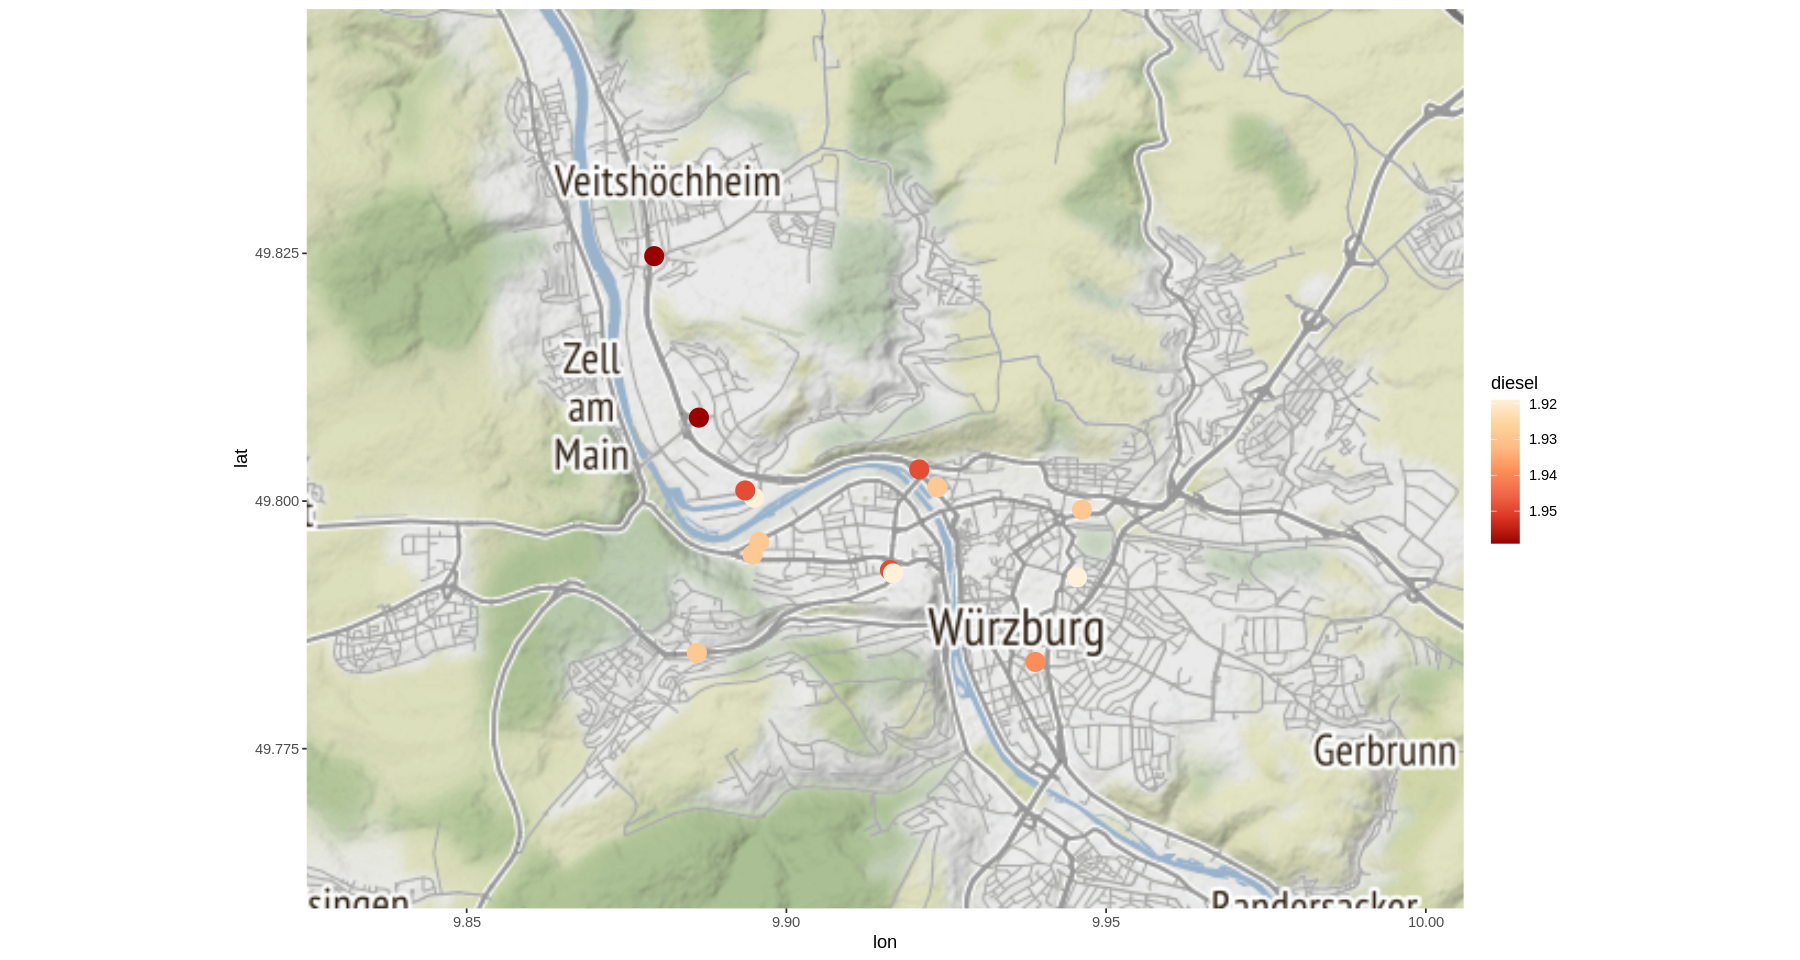

In [ ]:
ggmap(sq_map2) +
geom_point(data=req$stations,aes(x=lng,
                                 y=lat,
                                 color=diesel), size = 5) +
scale_color_distiller(palette = "OrRd", trans = "reverse")

## Web Scraping Overview

* Web scraping is an umbrella term for automated extraction of information from websites
* In turn the entirety of WWW resources are turned into a source of potential data for many different projects in business and research
* We want to discuss how to get data from the World Wide Web using R
* After a few fundamental concepts we will spent most of the time on getting data from websites that do not offer any interface to automate information retrieval

### Key reasons for webscraping

* Data Format: There is a wealth of data on websites but designed for human consumption. As such, we cannot use it for data analysis as it is not in a suitable format/shape/structure.
* No copy/paste: We cannot copy & paste the data into a local file. Even if we do it, it will not be in the required format for data analysis.
* No save/download: There are no options to save/download the required data from the websites. We cannot right click and save or click on a download button to extract the required data.
* Automation: With web scraping, we can automate the process of data extraction/harvesting.

### Available R Packages

Relevant CRAN Task View: https://CRAN.R-project.org/view=WebTechnologies

*Major packages*

* `Rcurl` provides functions to fetch URIs, get & post forms
* `httr` interface for executing HTTP methods with support for modern web authentication protocols
* `rvest` a higher level package which is simpler to use for basic tasks.
* `Rselenium` can be used to automate interactions and extract page content from dynamically generated webpages (i.e., those requiring user interaction to display results like clicking on button)

We will focus on `rvest`.

## Basics of Web Technology

* Uniform Resource Locators (URL) establish request messages which facilitate basic web communication. Build up from different components:
    * Protocol (`http` or `https`)
    * Domain (`www.xyz.dom`)
    * Port (`:1234`)
    * Path (`/here/be/data/`)
    * Request(`?value=xyz`)

* A domain controls automated extraction permissions by means of the file `robots.txt` in any path
    * We can check by means of the `robotstxt::paths_allowed()`

In [ ]:
install.packages('robotstxt')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘globals’, ‘listenv’, ‘parallelly’, ‘spiderbar’, ‘future’, ‘future.apply’




In [ ]:
library(robotstxt)
paths_allowed(
  paths = c("http://www.transfermarkt.de/","http://www.imdb.com/title/")
)

 www.transfermarkt.de                      
 www.imdb.com                      





[1] TRUE TRUE

To scrape website data some context of Web Technology and web site structures is helpful

A web page typically is made up of the following:

* HTML (Hyper Text Markup Language) takes care of the content. You need to have a basic knowledge of HTML tags as the content is typically located with these tags.
* CSS (Cascading Style Sheets) takes care of the appearance of the content. While you do not need to look into the CSS of a web page, you should be able to identify the id or class that manage the appearance of content.
* JS (Javascript) takes care of the behavior of the web page. Sites making heavy use of JS will require more careful scraping strategies.

### HTML and XML

* HyperText Markup Language (HTML) describes and defines the content of a webpage

    * "Hyper Text" in HTML refers to links that connect webpages to one another, either within a single website or between websites

* HTML uses "markup" to annotate text, images, and other content for display in a Web browser. HTML markup includes special "elements"" such as `<head>`, `<title>`, `<body>`, `<header>`, `<footer>`, `<article>`, `<section>`,  `<p>`, `<div>`, `<span>`, `<img>`, and many others.

* Using you web browser, you can inspect the HTML content of any webpage of the World Wide Web.

* The eXtensible Markup Language (XML) provides a general approach for representing all types of information, such as data sets containing numerical and categorical variables
* XML provides the basic, common, and quite simple structure and syntax for all dialects or vocabularies
    * HTML, SVG and EML are specific vocabularies of XML.

### HTML Elements

* HTML elements consist of a start tag and end tag with content inserted in between
* They can be nested and are case insensitive
* The tags can have attributes which usually come as name/value pairs
* When scraping web data we can use a combination of HTML tags and attributes to locate the content we want to extract
![Image](https://tutorial.techaltum.com/images/element.png)


* The Document Object Model (DOM) defines the logical structure of a document and the way it is accessed and manipulated
* HTML is structured as a tree and you should be able to characterize the path to any node or tag

![Image](https://www.w3schools.com/whatis/img_htmltree.gif)



Below is a list of basic HTML which are helpful for web scraping

Tag | Description
--- | ---
`<html> </html>` | root node of html document
`<head> </head>` | head node of html document
`<title> </title>` | page title
`<body> </body>` | the body stores most the main page content
`<li> </li>` | list item
`<b> </b>` | bold font
`<p> </p>` | paragaph
`<img src="xxx"> </img>` | inserts image from source `xxx`
`<a href="xxx"> </a>` | links to destintation `xxx`

## Scraping with `rvest`: Main functions and basic workflow

* Obtain an html document from a url, a file on disk or a string containing html with `read_html()`
* Select parts of a document using css selectors: `html_nodes(doc, "table td")`
* Extract components with `html_tag()` (the name of the tag), `html_text()` (all text inside the tag), `html_attr()` (contents of a single attribute) and `html_attrs()` (all attributes) or parse tables into data frames with `html_table()`
* These functions can again be nicely stringed together using the pipe operator `%>%` - therefore we import both `rvest`and `tidyverse`

In [7]:
library(tidyverse)
library(rvest)

cities = "https://en.wikipedia.org/wiki/List_of_largest_cities"

cities %>%
  read_html() %>%
  html_table(fill = TRUE, header = TRUE) %>%
  pluck(2) %>%
  select(c(1,2,6))


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




City[a],Country,City proper[c]
<chr>,<chr>,<chr>
City[a],Country,Area.mw-parser-output .nobold{font-weight:normal}(km2)
,,
Tokyo,Japan,"2,191"
Delhi,India,"1,484"
Shanghai,China,"6,341"
São Paulo,Brazil,"1,521"
Mexico City,Mexico,"1,485"
Cairo,Egypt,"3,085"
Mumbai,India,603


### Selecting Nodes

* If the data is not explicitly organized as a table, we need to use formatting queues to isolate data points

* `html_node()` and `html_node()` allow us to specify css selectors or xpaths to select content on a website

* Using http://selectorgadget.com/ this can be a very easy task, sometimes we need to try around a little

In [ ]:
toniErdman = "http://www.imdb.com/title/tt4048272/?ref_=nv_sr_1"

toniErdman %>%
  read_html() %>%
  html_nodes(".sc-18baf029-7") -> actorNodes


In [ ]:
getActorDetails = function(actorNode)
    {

actorNode %>%
    html_node(".sc-18baf029-1") %>%
    html_text() -> name

actorNode %>%
    html_node(".ipc-image") %>%
    html_attr("src") -> img_url

localpath = NA
if(!is.na(img_url))
    {
download.file(img_url, paste0(str_trim(name),".jpeg"), mode = 'wb')
    localpath = paste0(str_trim(name),".jpeg")
    }

return(data.frame(name=name, localimagepath=localpath, image=img_url))
}

map_df(actorNodes, getActorDetails) -> actors


actors

name,localimagepath,image
<chr>,<chr>,<chr>
Sandra Hüller,Sandra Hüller.jpeg,"https://m.media-amazon.com/images/M/MV5BN2NmMzVhOTktNjc3Yy00YWJlLWFmYmQtMTgyYzIxZDBmNTk0XkEyXkFqcGdeQXVyMTExNzQ3MzAw._V1_QL75_UX140_CR0,12,140,140_.jpg"
Peter Simonischek,Peter Simonischek.jpeg,"https://m.media-amazon.com/images/M/MV5BODhiMWYyMWYtOGMzZS00M2QxLWE3MTMtOTRjYTUzOTQzOTlkXkEyXkFqcGdeQXVyNDkzNTM2ODg@._V1_QL75_UY140_CR35,0,140,140_.jpg"
Michael Wittenborn,Michael Wittenborn.jpeg,"https://m.media-amazon.com/images/M/MV5BYTQyZGU4OWUtYjQ1Yy00YzNkLTkxNjMtZTU3NzViZmNhYTBhXkEyXkFqcGdeQXVyNDkzNTM2ODg@._V1_QL75_UX140_CR0,0,140,140_.jpg"
Thomas Loibl,Thomas Loibl.jpeg,"https://m.media-amazon.com/images/M/MV5BYWUwNzk5NzEtM2RlZS00OTAzLTgwYjUtYzQ0ZWYzMzFkMDliXkEyXkFqcGdeQXVyNDkzNTM2ODg@._V1_QL75_UX140_CR0,0,140,140_.jpg"
Trystan Pütter,Trystan Pütter.jpeg,"https://m.media-amazon.com/images/M/MV5BMTQ1MTMyNzgzNV5BMl5BanBnXkFtZTcwNjYyMDc3MQ@@._V1_QL75_UX140_CR0,12,140,140_.jpg"
Ingrid Bisu,Ingrid Bisu.jpeg,"https://m.media-amazon.com/images/M/MV5BYzRlMWZkNDItZTk3YS00MDM2LWIwMzYtOTkwMTY0YWEzYzM2XkEyXkFqcGdeQXVyOTIzMzc2NQ@@._V1_QL75_UX140_CR0,12,140,140_.jpg"
Hadewych Minis,Hadewych Minis.jpeg,"https://m.media-amazon.com/images/M/MV5BMTUyOTY0MDY0Ml5BMl5BanBnXkFtZTgwNjM4NTEwOTE@._V1_QL75_UX140_CR0,13,140,140_.jpg"
Lucy Russell,Lucy Russell.jpeg,"https://m.media-amazon.com/images/M/MV5BNGZmMzNiYjUtZDYwNC00MmY1LWFmNGItMzlkZDA1OTMzM2Q3XkEyXkFqcGdeQXVyMDc1MzI2Mw@@._V1_QL75_UX140_CR0,1,140,140_.jpg"
Victoria Cocias,Victoria Cocias.jpeg,"https://m.media-amazon.com/images/M/MV5BZmVmZmI0MTAtZjUzYS00NTM1LTk3ZTUtNjQ5ZGM3NzRmN2JjXkEyXkFqcGdeQXVyNDkzNTM2ODg@._V1_QL75_UY140_CR36,0,140,140_.jpg"


In [ ]:
immoWelt = "https://www.immowelt.de/liste/wuerzburg/haeuser/kaufen?sort=relevanz"

immoWelt %>%
  read_html() %>%
  html_nodes(".EstateItem-1c115") -> immoNodes

In [ ]:
getImmoDetails = function(immoNode)
    {

immoNode %>%
    html_node("h2") %>%
    html_text() -> name

immoNode %>%
    html_node(".IconFact-e8a23:nth-child(1) span") %>%
    html_text() -> ort

immoNode %>%
    html_node(".KeyFacts-efbce div:nth-child(1)") %>%
    html_text() -> preis

immoNode %>%
    html_node(".KeyFacts-efbce div:nth-child(2)") %>%
    html_text() -> groesse

immoNode %>%
    html_node(".KeyFacts-efbce div:nth-child(3)") %>%
    html_text() -> zimmer

return(data.frame(name=name, ort=ort, preis=preis, groesse=groesse, zimmer=zimmer))
}

map_df(immoNodes, getImmoDetails)

name,ort,preis,groesse,zimmer
<chr>,<chr>,<chr>,<chr>,<chr>
Coming Home,Würzburg / Lengfeld (Lengfeld),649.000 €,153.75 m²,7 Zi.
Mehrfamilienhaus in Bestlage,Würzburg (Altstadt),2.100.000 €,405 m²,
Mehrfamilienhaus mit 8 Einheiten in Grombühl,Würzburg (Grombühl),1.499.000 €,406 m²,18 Zi.
3Whg /10 Zimmer für Großfamilien und Anleger4500€MM(97277 Neubrunn),Würzburg (Altstadt),800.000 €,310 m²,10 Zi.
"Gepflegtes Einfamilienhaus, mit Doppelgarage und Garten, in Würzburg/Heidingsfeld",Würzburg (Heidingsfeld),599.000 €,97.4 m²,
Wü-Rottenbauer: Einfamilienhaus mit Einliegerwohnung,Würzburg (Rottenbauer),750.000 €,176 m²,
Reihenhaus in Würzburg-Stadtteil,Würzburg (Lengfeld),570.000 €,120 m²,
2-Familienhaus mit Einliegerwohnung in Würzburg - Heidingsfeld,Würzburg (Heidingsfeld),1.350.000 €,336 m²,8.5 Zi.
!!!VERKAUFT!!! Architektenhaus mit drei Wohnungen in Giebelstadt-Eßfeld,Würzburg (Altstadt),950.000 €,320 m²,


### Excursus: Cleaning strings with regular expressions
* Our results look promising so far
* However, we have already encountered artifacts that we want to get rid off
    * The population values had commas and source annotations
    * Cast list included strange non-printable artifacts
* Regular expressions (regex) are extremely useful in extracting information from any text by searching for one or more matches of a specific search pattern
* In `R` we can easily leverage the `str_replace()`, `str_replace_all()`, `str_remove()` and `str_remove_all()` funcions from `stringr` to leverage regex

https://github.com/NikoStein/ADS19/raw/master/Cheatsheets/Regex.pdf

In [ ]:
cities %>%
  read_html() %>%
  html_table(fill = TRUE, header = TRUE) %>%
  pluck(2) -> result

result

City[a],Country,UN 2018 population estimates[b],City proper[c],City proper[c],City proper[c],City proper[c],Metropolitan area[d],Metropolitan area[d],Metropolitan area[d],Urban area[8],Urban area[8],Urban area[8]
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
City[a],Country,UN 2018 population estimates[b],Definition,Population,Area(km2),Density(/km2),Population,Area(km2),Density(/km2),Population,Area(km2),Density(/km2)
,,,,,,,,,,,,
Tokyo,Japan,"37,468,000",Metropolis prefecture,"13,515,271","2,191","6,169[13]","37,274,000","13,452","2,771[14]","39,105,000","8,231","4,751[e]"
Delhi,India,"28,514,000",Capital City,"16,753,235","1,484","11,289[15]","29,000,000","3,483","8,326[16]","31,870,000","2,233","14,272[f]"
Shanghai,China,"25,582,000",Municipality,"24,870,895","6,341","3,922[17][18]",N/A,N/A,N/A,"22,118,000","4,069","5,436[g]"
São Paulo,Brazil,"21,650,000",Municipality,"12,252,023","1,521","8,055[19]","21,734,682","7,947","2,735[20]","22,495,000","3,237","6,949[h]"
Mexico City,Mexico,"21,581,000",City-state,"9,209,944","1,485","6,202[21]","21,804,515","7,866","2,772[22]","21,505,000","2,385","9,017"
Cairo,Egypt,"20,076,000",Urban governorate,"9,500,000","3,085","3,079[23]",N/A,N/A,N/A,"19,787,000","2,010","9,844"
Mumbai,India,"19,980,000",Municipality,"12,478,447",603,"20,694[24]","24,400,000","4,355","5,603[25]","22,186,000","1,008","22,010[26][i]"


In [ ]:
colnames(result) = ifelse(!colnames(result)==result[1,],paste(colnames(result),result[1,]),colnames(result) )

result %>% head()

City[a],Country,UN 2018 population estimates[b],City proper[c] Definition,City proper[c] Population,City proper[c] Area(km2),City proper[c] Density(/km2),Metropolitan area[d] Population,Metropolitan area[d] Area(km2),Metropolitan area[d] Density(/km2),Urban area[8] Population,Urban area[8] Area(km2),Urban area[8] Density(/km2)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
City[a],Country,UN 2018 population estimates[b],Definition,Population,Area(km2),Density(/km2),Population,Area(km2),Density(/km2),Population,Area(km2),Density(/km2)
,,,,,,,,,,,,
Tokyo,Japan,"37,468,000",Metropolis prefecture,"13,515,271","2,191","6,169[13]","37,274,000","13,452","2,771[14]","39,105,000","8,231","4,751[e]"
Delhi,India,"28,514,000",Capital City,"16,753,235","1,484","11,289[15]","29,000,000","3,483","8,326[16]","31,870,000","2,233","14,272[f]"
Shanghai,China,"25,582,000",Municipality,"24,870,895","6,341","3,922[17][18]",N/A,N/A,N/A,"22,118,000","4,069","5,436[g]"
São Paulo,Brazil,"21,650,000",Municipality,"12,252,023","1,521","8,055[19]","21,734,682","7,947","2,735[20]","22,495,000","3,237","6,949[h]"


In [ ]:
result %>%
  slice(-(1:2)) %>%
  select(1,2,7) -> result.small

colnames(result.small) = c("City", "Country", "PopulationDensity")

In [ ]:
result.small %>%
  mutate(PopulationDensity = str_remove_all(PopulationDensity, ",") ) %>% # remove commas
  mutate(PopulationDensity = str_remove_all(PopulationDensity, "\\[[\\d]*\\]")) %>% # remove arbitrary number of digits enclosed by square brackets
  mutate(PopulationDensity = as.numeric(PopulationDensity)) %>% #turn into number
head()

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


City,Country,PopulationDensity
<chr>,<chr>,<dbl>
Tokyo,Japan,6169
Delhi,India,11289
Shanghai,China,3922
São Paulo,Brazil,8055
Mexico City,Mexico,6202
Cairo,Egypt,3079


### Programming Task

* Jeopardy! is a famous trivia show which has been running in the US for over thirty years
* All past episodes have been archived at http://www.j-archive.com/ and can be retrieved for practice or analysis
* Retrieve all questions for an episode of your choice
* Create a function that takes one argument - a string URL for the episode and return the final Jeopardy question

## Subpage Navigation

* Very often we have an overview site and then want to crawl all children sites

* Three step approach:
    * Retrieve the list of sub URLs using the techniques described before
    * Write a function which given an URL retrieves the relevant data from the subpage
    * Use `map` to execute the retrieval function on each of the URLs extracted in step 1

In [ ]:
overview = "http://www.j-archive.com/showseason.php?season=35"
overview %>%
  read_html() %>%
  html_nodes("td:nth-child(1) a") %>%
  html_attr("href") -> allURLs
head(allURLs,3)

getTitleOfEpisode = function(url){
  url %>%
    read_html() %>%
    html_node("h1") %>%
    html_text()}
map_chr(head(allURLs), getTitleOfEpisode)

[1] "https://j-archive.com/showgame.php?game_id=6389"
[2] "https://j-archive.com/showgame.php?game_id=6388"
[3] "https://j-archive.com/showgame.php?game_id=6386"

[1] "Show #8045 - Friday, July 26, 2019"   
[2] "Show #8044 - Thursday, July 25, 2019" 
[3] "Show #8043 - Wednesday, July 24, 2019"
[4] "Show #8042 - Tuesday, July 23, 2019"  
[5] "Show #8041 - Monday, July 22, 2019"   
[6] "Show #8040 - Friday, July 19, 2019"

### Programming Task

* Create an rvest script that retrieves all players from a transfermarkt.de team website
e.g., http://www.transfermarkt.de/fc-bayern-munchen/startseite/verein/27/saison_id/2022

* Transform the script to a function that takes the entry point as a string argument

* Retrieve all the urls from the overview site:
http://www.transfermarkt.de/1-bundesliga/startseite/wettbewerb/L1/saison_id/2022

* Use a `map` function to retrieve all players from all clubs

* Extra effort: create a function to retrieve a player's relevant details (you may want to focus on age, games played, market value and primary position) and include it accordingly in your workflow

In [14]:
bayern = "http://www.transfermarkt.de/fc-bayern-munchen/startseite/verein/27/saison_id/2022"

bayern %>%
    read_html() %>%
    html_nodes(".inline-table") -> playerNodes

  #playerNodes

In [ ]:
getPlayerDetails = function(playerNode) {
    playerNode %>%
    html_nodes(".hide-for-small a") %>%
    html_text() -> name

    playerNode %>%
    html_nodes(".hide-for-small a") %>%
    html_attr("href") -> url

    #Marktwert ergänzen

    data.frame(name = name, url = paste0("www.transfermarkt.de",url))
}

map_df(playerNodes, getPlayerDetails)

In [22]:
getPlayerDetails = function(playerNode) {
    playerNode %>%
    html_nodes(".hide-for-small a") %>%
    html_text() -> name

    playerNode %>%
    html_nodes(".hide-for-small a") %>%
    html_attr("href") -> url

    data.frame(name = name, url = paste0("www.transfermarkt.de",url))
}

#Marktwert

getPlayerValue = function(playerNode) {
    playerNode %>%
    html_node (".rechts.hauptlink a") %>%
    html_text() -> wert

    data.frame(marktwert = wert)

}

map_df(playerNodes, getPlayerDetails) -> playerDetails
cbind(playerDetails, map_df(playerNodes, getPlayerValue))

name,url,marktwert
<chr>,<chr>,<chr>
Manuel Neuer,www.transfermarkt.de/manuel-neuer/profil/spieler/17259,
Yann Sommer,www.transfermarkt.de/yann-sommer/profil/spieler/42205,
Sven Ulreich,www.transfermarkt.de/sven-ulreich/profil/spieler/40680,
Johannes Schenk,www.transfermarkt.de/johannes-schenk/profil/spieler/604326,
Matthijs de Ligt,www.transfermarkt.de/matthijs-de-ligt/profil/spieler/326031,
Dayot Upamecano,www.transfermarkt.de/dayot-upamecano/profil/spieler/344695,
Lucas Hernández,www.transfermarkt.de/lucas-hernandez/profil/spieler/281963,
Alphonso Davies,www.transfermarkt.de/alphonso-davies/profil/spieler/424204,
Daley Blind,www.transfermarkt.de/daley-blind/profil/spieler/12282,
